# Assignment 3: Clustering
## DAT405 Introduction to Data Science and AI
### By Pauline Nässlander and Albin Ekström
Hours spent on the assignment:
* Pauline Nässlander: 8 hours
* Albin Ekström: 8 hours

## Question 1

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data/data_all.csv')

x_phi = df['phi'].array
y_psi = df['psi'].array

X = np.vstack((x_phi, y_psi)).T


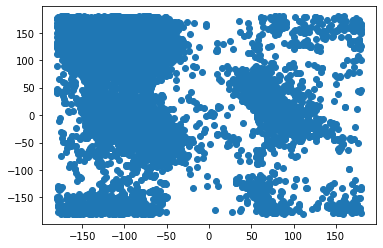

In [20]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Question 2

In [21]:
# import packages
from sklearn.cluster import KMeans

In [22]:
elbow_method = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    elbow_method.append(kmeans.inertia_)

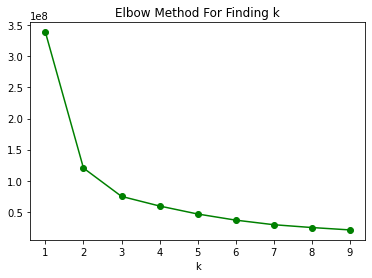

In [23]:
plt.plot(K, elbow_method, 'go-')
plt.xlabel('k')
plt.title('Elbow Method For Finding k')
plt.show()

### 2A
Experiments with different values of K gave us that an appropriate value of K is 4. We also found this out by using the elbow method which gave us the graph “Elbow Method For Finding K”. By looking at this graph we thought that the increased performance started to stagger when we reached K = 4. We did this for both the “500” data and on all the data and for both of them 4 seemed the right choice.

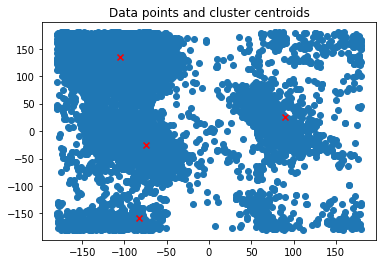

In [24]:
kmeans = KMeans(n_clusters=4).fit(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
 
plt.title('Data points and cluster centroids')
plt.show()

### 2C
They seem somewhat reasonable, but there are three spots in the data_all graph that we think could be clusters but these are not noticed by the K-mean method. Even if we increase K to say 7 these new centers end up in the large cluster to the left and do not locate the new cluster centers in the clusters to the right that we noticed. In addition, we notice that since the angles -180 and +180 are the same some of the clusters will continue across the border. For example a cluster could start at -150 and continue over to positive 150 but the k-mean algorithm would not notice these as the same cluster.

In [25]:
# trying modify the data by shifting and modulos
x_phi_mod = (df['phi'].array) % 360
y_psi_mod = (df['psi'].array + 110) % 360

X_mod = np.vstack((x_phi_mod, y_psi_mod)).T

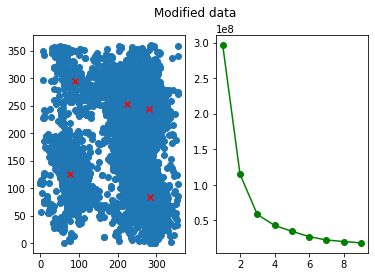

In [26]:
elbow_method = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_mod)
    elbow_method.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=5).fit(X_mod)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Modified data')
ax1.scatter(X_mod[:,0], X_mod[:,1])
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
ax2.plot(K, elbow_method, 'go-')
plt.show()

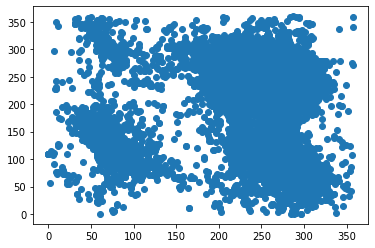

In [27]:
plt.scatter(X_mod[:,0], X_mod[:,1])
plt.show()

### 2D
Yes we can try to fix the problem with clusters continuing beyond borders with this. First we looked at the psi angles and noticed that if we added 110 to the psi data and took modulo 360 of this, then no cluster would be seperated in the 2D plot in y direction. Then we looked at the phi angles and saw that the same principle could be applied here. Since we saw a clear line at 0 degrees we took modulo 360 on all phi data and then no clusters were separated by the 2D plot borders. If we now use the elbow method to optimize the choice of K we can see that 4 clusters are still the best choice but this now has a lower sum of squared distances which indicates a better result. On the other hand when looking at the graph the most reasonable amount of clusters by looking at the modified data is 3 clusters

## Question 3

In [28]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [29]:
# create DBSCAN
X = X_mod
db = DBSCAN(eps=12, min_samples=13).fit(X) #here we choose epsilon and min samples in a neighbourhood in order to be core point
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_


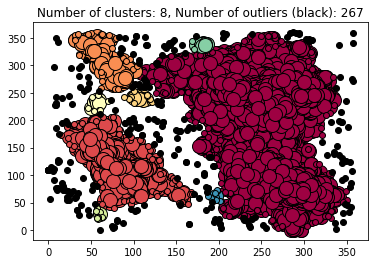

In [30]:
# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color is used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
outliers = list(labels).count(-1)
plt.title('Number of clusters: {}, Number of outliers (black): {}'.format(clusters, outliers))
plt.show()

### 3A
Running DBScan on the modified data, as we said in question 2d the most reasonable amount of clusters seem to be 3. Therefore, we first strived for creating three different clusters with the DBScan algorithm. However, from wikipedia (https://en.wikipedia.org/wiki/DBSCAN) it’s said “In general, small values of ε are preferable” which we couldn’t have when striving for 3 clusters so we changed our strategy and chose values of epsilon and min samples that gave reasonable clusters.

It was hard to obtain a few clusters, because there are small groups of data points in the dataset that become individual clusters even if they with the eye seem to be connected to the bigger cluster. The choice of number of samples is tightly coupled with choice of epsilon. The best minimum number of samples seems to be around 13, connected to it the best maximum value of epsilon is 12

{'LYS': 14, 'PRO': 3, 'LEU': 13, 'TYR': 16, 'CYS': 0, 'SER': 14, 'ASN': 32, 'GLY': 73, 'HIS': 4, 'PHE': 3, 'ARG': 12, 'ILE': 5, 'ASP': 11, 'THR': 13, 'VAL': 13, 'GLN': 8, 'ALA': 13, 'GLU': 13, 'TRP': 2, 'MET': 5}


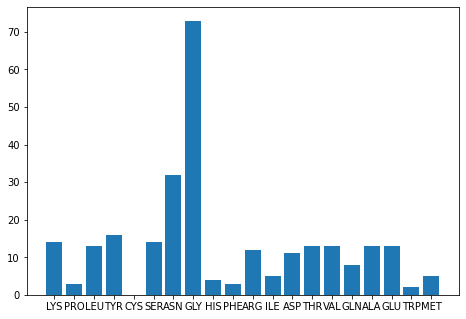

In [31]:
residue_types = {}
i = 0

#Go through all points and add residue type and count number of times as an outlier in dictionary
for type in df['residue name'].array:
    if not type in residue_types:
        residue_types[type] = 0
    if labels[i] == -1:
        residue_types[type] += 1
    i = i + 1

print(residue_types)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residue_types.keys(),residue_types.values())
plt.show()

### 3B
Assuming the list labels are arranged in the same order as it comes in the same order as it does in the dataframe. From this assumption plotting the bar chart we can see that GLY is the most common acid among the outliers.

### 3C
The centerpoints in K-means heavily depend on how many clusters we set. If we set the amount of clusters to 4, the K-means does get a strange centerpoint down in the middle of the large cluster. In other words the large cluster gets divided in two. As we increase the number of clusters there will be more and more centerpoints in the large cluster. This differs from the DBScan model which has some small clusters on the outside of the large cluster but the large cluster is not divided as it gets when using the K-mean method.

To compare the two clustering algorithms is hard to do, because they cluster very differently. DBScan is better than K-means to get the large cluster to one. The K-means divides it into several clusters. However DBScan is quicker to melt the orange and the burgundy clusters in the graph above into one when changing epsilon and min samples slightly. This is different from K-means which separate these clusters as soon as we create more than 5 centerpoints.

### 3D
In our observations the clusters found in DBSCAN are not robust even to small changes in minimum number of samples in a neighborhood for it to be labeled core point and/or small changes of epsilon. The number of clusters varies even if we only change epsilon or min samples by 1. This being said, the larger clusters are somewhat robust to small changes even though the small ones change, except in the case when we increase epsilon or decrease min samples to the point that the cluster in the top left corner merges with the largest cluster in the plot.

## Question 4

In [32]:
x_phi_PRO = []
y_psi_PRO = []
i = 0
for type in df['residue name'].array:
    if type == 'PRO':
        x_phi_PRO.append(x_phi_mod[i])
        y_psi_PRO.append(y_psi_mod[i])
    i = i + 1


In [33]:
# create DBSCAN for PRO
X = np.vstack((x_phi_PRO, y_psi_PRO)).T
db = DBSCAN(eps=12, min_samples=13).fit(X) #here we choose epsilon and min samples in a neighbourhood in order to be core point
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

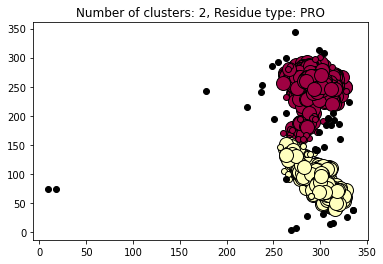

In [34]:
# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color is used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
plt.title('Number of clusters: {}, Residue type: PRO'.format(clusters))
plt.show()

In [35]:
x_phi_GLY = []
y_psi_GLY = []
i = 0
for type in df['residue name'].array:
    if type == 'GLY':
        x_phi_GLY.append(x_phi_mod[i])
        y_psi_GLY.append(y_psi_mod[i])
    i = i + 1

In [36]:
# create DBSCAN for GLY
X = np.vstack((x_phi_GLY, y_psi_GLY)).T
db = DBSCAN(eps=15, min_samples=17).fit(X) #here we choose epsilon and min samples in a neighbourhood in order to be core point
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

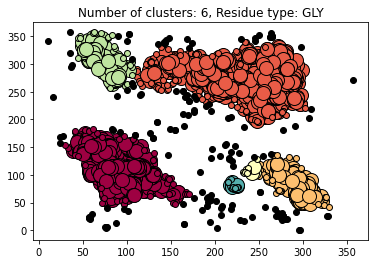

In [37]:
# Plot result
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color is used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

clusters = len(set(labels)) - (1 if -1 in labels else 0)
plt.title('Number of clusters: {}, Residue type: GLY'.format(clusters))
plt.show()

### 4
Running only the amino acid residues of type PRO without any other types plotted shows how it’s a part of the “large cluster”, but when running the same parameter settings on the data we obtain 2 clusters, which also seems to be the case if we look at it with the human eye. It would be hard to cluster these PRO type out of the general cluster, because of the cluster’s density. Therefore, to find the right parameters when using DBScan on all types would be very difficult, if even possible.

For the amino acid residue GLY the scatter plot shows how it belongs to several different clusters from the original DBScan on all amino acids. In other words the data points are very scattered. When running the DBScan, with some tweaked parameters (epsilon = 15, min samples = 17) we obtain 6 clusters, but with 4 bigger ones. Two of them are a part of the general cluster, but on different sides (one up at y = 350 to 200 and the other one y = 120 to 20). The other two clusters actually seem to be the other two clusters from the original clustering with all amino acids apart from the big general cluster.

In conclusion it seems to be extremely difficult to cluster the “data_all” correctly into groups with one amino acid in each when many residue types have data points that are scattered out like this.